# Load in Packages

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.colors import PowerNorm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
from skimage.draw import disk
from scipy.optimize import curve_fit
from scipy import signal
from scipy.fft import fft, fftshift
#from lmfit import Parameters, minimize, report_fit
from obspy.imaging.cm import viridis_white
import cmocean
import xarray as xr
from math import nan
import multiprocessing

from Loader import DataLoader
from Main import main
from Manager import DataHandler, FigureHandler, PlotHandler, ValueHandler, SliderManager, EventHandler, CheckButtonManager, ClickButtonManager
import mpes
from mpes import cmap_LTL, cmap_LTL2
%load_ext autoreload
%autoreload 2

# Load the Data
### Specify Filename and Path

In [15]:
# Specify datapath, filename, and [Energy, Delay] offsets to load.
data_path = 'R:\Lawson\Data\metis'
#data_path = '/Users/lawsonlloyd/Desktop/Data/metis'

filename, offsets = 'Scan162_RT_120x120x115x50_binned.h5', [0.8467, -120]
filename, offsets = 'Scan0804_30K_Pprobe_Spump_binned.h5', [.5047, -102]

filename, offsets = 'Scan1042_binned.h5', [-0.4, 0]
filename, offsets = 'Scan1052_binned.h5', [0, 0]
filename, offsets = 'Scan1058_binned.h5', [-2, 0]
filename, offsets = 'Scan1060_binned.h5', [-4, 0]
filename, offsets = 'Scan1062_binned.h5', [-5.5, 0]
filename, offsets = 'Scan1063_binned.h5', [-4.5, 0]
filename, offsets = 'Scan1064_binned.h5', [-4.75, 0]
filename, offsets = 'Scan1076_binned.h5', [-0.4, 0]
filename, offsets = 'Scan1095_binned.h5', [0, 0]
filename, offsets = 'Scan1097_binned.h5', [0, 0]

filename, offsets = 'Scan129_binned_200x200x300_CrSBr_Integrated_XUV_Pol.h5', [0, 0]

### Load the data, Generate Normalized and Difference Data


In [ ]:
# Load the Data
data_loader = DataLoader(data_path + '//' + filename, offsets = offsets)
I = data_loader.load()

# Truncate and Normalize Data, if desired.
#I = I.loc[{"delay":slice(-250,780)}]
I = I/np.max(I)

# Normalize Each Time Step to the Total Volume Counts, if desired
#I = I / I.sum(dim=('kx','ky','E'))
#I = I/np.max(I)

# Generate Difference Data (Pos - Neg Delay Times), if desired.
#I_diff = I - I.loc[{"delay":slice(-250,-150)}].mean(dim="delay")
#I_diff = I_diff/np.max(I_diff)

I_res = I

The data shape is: (200, 200, 300)
"R:\Lawson\Data\metis//Scan129_binned_200x200x300_CrSBr_Integrated_XUV_Pol.h5" has been loaded! Happy Analysis...


# Analysis and Visualization
### Launch Interactive GUI

In [ ]:
%matplotlib qt

main(I)

# run start python launch_gui_v0.py in terminal

### Plot Momentum Maps at Constant Energy

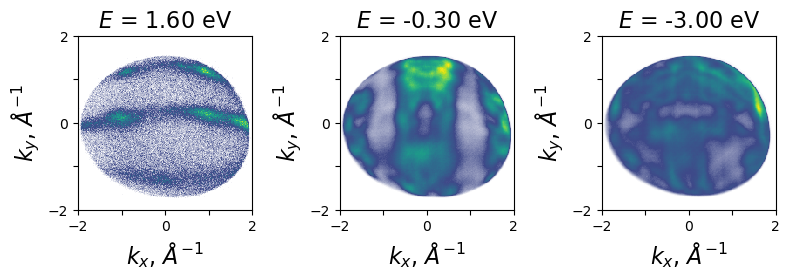

In [18]:
%matplotlib inline
cmap_plot = cmap_LTL

E, E_int = [1.6, -.3, -3], .2
#delays, delay_int = 500, 1000

fig, ax, im = mpes.plot_momentum_maps(
    I_res, E=E, E_int=E_int, delays=None, delay_int=None,
    cmap=cmap_LTL, scale=[0, 1],
    fontsize=16, figsize=(8, 3), colorbar=False, panel_labels = False
)

#mpes.overlay_bz('rectangular', 3.508, 4.763, ax[1], 'black', rotation_deg = 0, repeat = 0)
#mpes.overlay_bz('hexagonal', 5.8, 5.8, ax[0], 'black', repeat = 2, rotation_deg = 90)
#mpes.save_figure(fig, name = f'test', image_format = 'pdf')

### Plot Momentum vs Energy Cuts

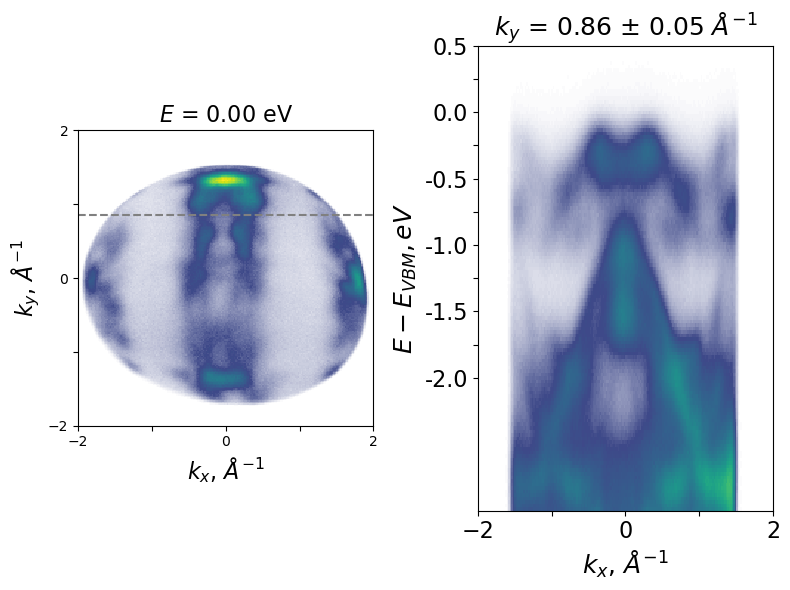

In [47]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(8, 6, forward=False)
axs = axs.flatten()

# Plot momentum map
mpes.plot_momentum_maps(
    I_res, E=0, E_int=0.2, delays=None, delay_int=None,
    fig = fig, ax = axs[0],
    cmap=cmap_plot,
    panel_labels=False, fontsize=16,
    nrows=2, figsize=(12, 12)
)

# # Plot k - E (arbitrary Cut)
# k_start, k_end = (-1.5, 1), (1.6, -.7)
# #I_cut, k_vals, E_vals = mpes.get_k_cut(I_res.mean(dim="delay"), k_start=k_start, k_end=k_end)
# I_cut, k_vals, E_vals = mpes.get_k_cut(I_res, k_start=k_start, k_end=k_end)

# axs[0].plot(k_start[0], k_start[1], 'ro')
# axs[0].plot(k_end[0], k_end[1], 'ro')
# axs[0].plot([k_start[0], k_end[0]], [k_start[1], k_end[1]], color = 'red', linestyle = 'dashed')

# axs[1].pcolormesh(k_vals, E_vals, I_cut, shading='auto', cmap=cmap_LTL)
# axs[1].set_xlabel("k along cut ($\AA^{-1}$)")
# axs[1].set_ylabel("Energy (eV)")
# axs[1].set_title("E vs k slice", color = 'red')
# axs[1].set_ylim(-6,1)
# axs[1].set_aspect(1)

# # Plot k - E (arbitrary Cut)
# k_start, k_end = (-1.5, 0.9), (1.5, 0.9)
# #I_cut, k_vals, E_vals = mpes.get_k_cut(I_res.mean(dim="delay"), k_start=k_start, k_end=k_end)
# I_cut, k_vals, E_vals = mpes.get_k_cut(I_res, k_start=k_start, k_end=k_end)

# axs[0].plot(k_start[0], k_start[1], 'bo')
# axs[0].plot(k_end[0], k_end[1], 'bo')
# axs[0].plot([k_start[0], k_end[0]], [k_start[1], k_end[1]], color = 'blue', linestyle = 'dashed')

# axs[2].pcolormesh(k_vals, E_vals, I_cut, shading='auto', cmap=cmap_LTL)
# axs[2].set_xlabel("k along cut ($\AA^{-1}$)")
# axs[2].set_ylabel("Energy (eV)")
# axs[2].set_title("E vs k slice", color = 'blue')
# axs[2].set_ylim(-6,1)
# axs[2].set_aspect(1)

# Plot kx-E frame
(kx, ky), (kx_int, ky_int) = (0, .86), (.1, 0.1) # Central (kx, ky) point and k-integration
mpes.plot_kx_frame(
    I_res, ky, ky_int,
    E_enhance = 1,
    subtract_neg=True, neg_delays=[-500,-100],
    fig = fig, ax = axs[1],
    cmap = cmap_plot, scale=[0,1], energy_limits=[-3,0.5]
)
axs[0].axhline(ky, linestyle = 'dashed', color = 'grey')
# # Plot ky-E frame
# (kx, ky), (kx_int, ky_int) = (0, 0), (0.2, 0.2) # Central (kx, ky) point and k-integration
# mpes.plot_ky_frame(
#     I_res, ky, ky_int,
#     subtract_neg=True, neg_delays=[-500,-100],
#     fig = fig, ax = axs[1],
#     cmap = cmap_plot, scale=[0,1], energy_limits=[-3,.5]
#     )

fig.tight_layout()


### Plot (& Fit) Delay Traces

KeyError: 'delay'

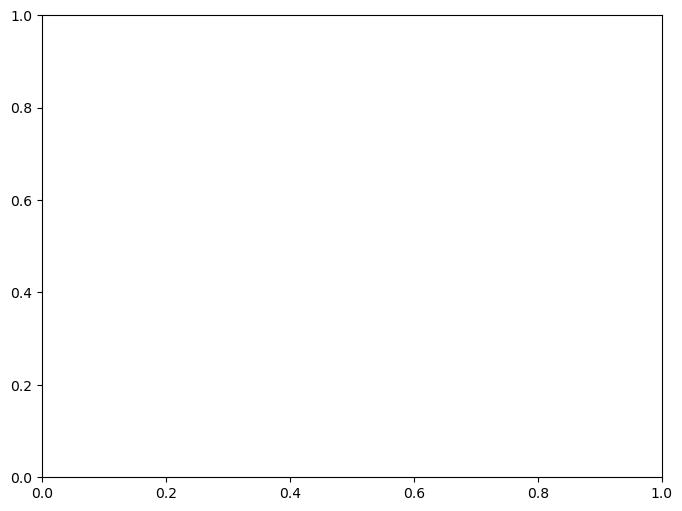

In [19]:
E, E_int = [1.6, 1], .12 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = False
neg_delays = [-300, -120]

fig, axs = plt.subplots()
fig.set_size_inches(8, 6, forward=False)
#axs = axs.flatten()

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = axs,
    colors = ['black', 'purple'],
    fontsize=16
)

### Do a Fitting: Choose model (input as string, e.g. 'monoexp') and input fit parameters (p0, bounds etc.)
delay_limits = (-200, 1000)
delay_axis = I.delay.loc[{"delay":slice(delay_limits[0], delay_limits[1])}].values

# Curve 1
time_trace = mpes.get_time_trace(I, 1.25, E_int, (kx, ky), (kx_int, ky_int), norm_trace = True, subtract_neg = True, neg_delays = (-300, -50))
time_trace = time_trace.loc[{"delay":slice(delay_limits[0], delay_limits[1])}].values

model = 'biexp'
p0 = [1, 100, 1, 1000]
lower_bounds, upper_bounds = (0, 0, 0, 0), (10, 100000, 10, 20000)
popt, pcov, fit_curve_1 = mpes.fit_time_trace(model, delay_axis, time_trace, p0, [lower_bounds, upper_bounds], convolve = True, sigma_IRF = 45)
ex_fit = mpes.print_fit_results(model, popt, pcov)

# Curve 2
time_trace = mpes.get_time_trace(I, 1.49, E_int, (kx, ky), (kx_int, ky_int), norm_trace = True, subtract_neg = True, neg_delays = (-300, -50))
time_trace = time_trace.loc[{"delay":slice(delay_limits[0], delay_limits[1])}].values

model = 'exp_rise_monoexp_decay'
p0 = [2, 10, 120] #C, tau_rise, tau_decay1)
lower_bounds, upper_bounds = (0, 0, 0), (10, 2000, 10000)
popt, pcov, fit_curve_2 = mpes.fit_time_trace(model, delay_axis, time_trace, p0, [lower_bounds, upper_bounds], convolve = True, sigma_IRF = 80)
cbm_fit = mpes.print_fit_results(model, popt, pcov)

#conv_model = mpes.make_convolved_model(mpes.exp_rise_monoexp_decay, delay_axis, 40)
#init_curve = conv_model(delay_axis, *p0)

# Plot Fits
axs.plot(delay_axis, fit_curve_1, linestyle = 'dashed', color = 'green')
axs.plot(delay_axis, fit_curve_2, linestyle = 'dashed', color = 'blue')
axs.set_ylim(-0.1,1.1)


### Waterfall Plot: Momentum-Integrated Delay Dynamics

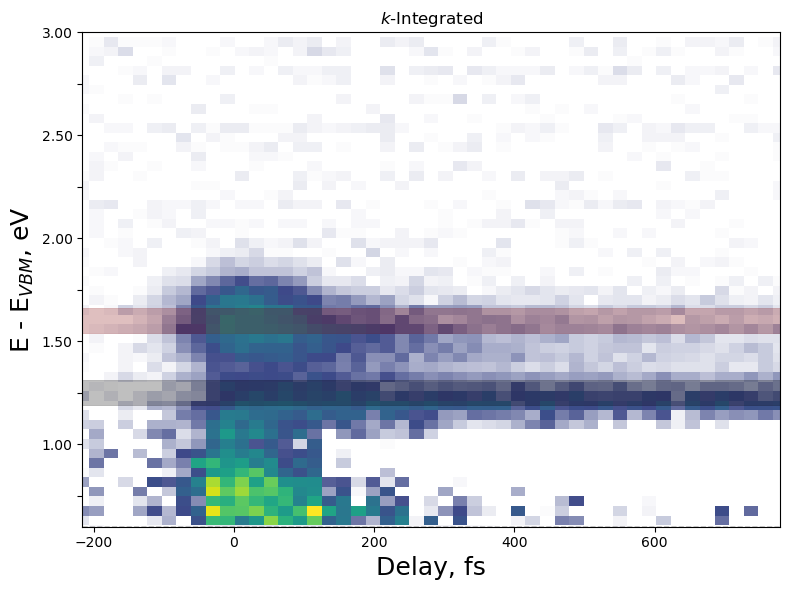

In [164]:
# Plot waterfall
fig, ax = plt.subplots()
fig.set_size_inches(8, 6, forward=False)

E, E_int = [1.25, 1.6], .12 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration

mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = ax,
    cmap=cmap_LTL, scale=[0,1], energy_limits=[0.6,3], subtract_neg = True, neg_delays = [-300, -180]
)

colors = ['black', 'maroon']

for i in np.arange(len(E)):

    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.25))
    ax.add_patch(rect3) #Add rectangle to plot

#ax.axhline(E[0])    
#ax.axhline(E[1])    

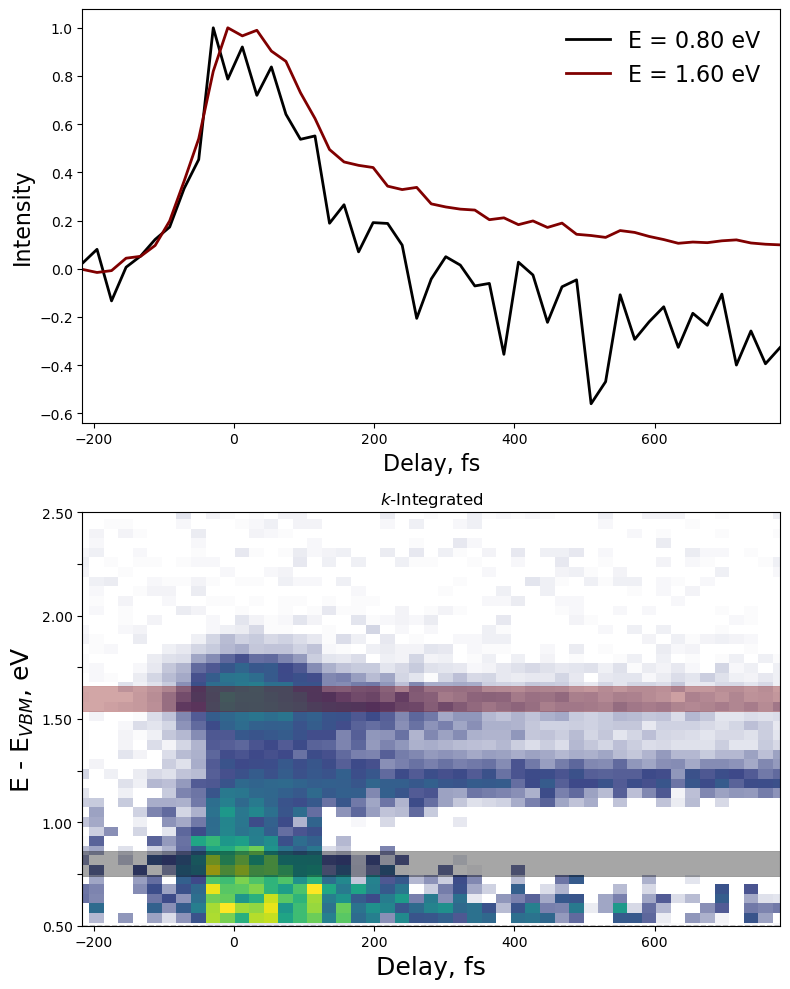

In [165]:
# Plot waterfall
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8, 10, forward=False)
ax = ax.flatten()

# Plot time traces
E, E_int = [0.8, 1.6], .120 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = True
neg_delays = [-250, -150]

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = ax[0],
    colors = ['black', 'maroon'],
    fontsize=16
)

mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = ax[1],
    cmap=cmap_LTL, scale=[0,1], energy_limits=[0.5,2.5]
)

colors = ['black', 'maroon']

for i in np.arange(len(E)):

    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.35))
    ax[1].add_patch(rect3) #Add rectangle to plot

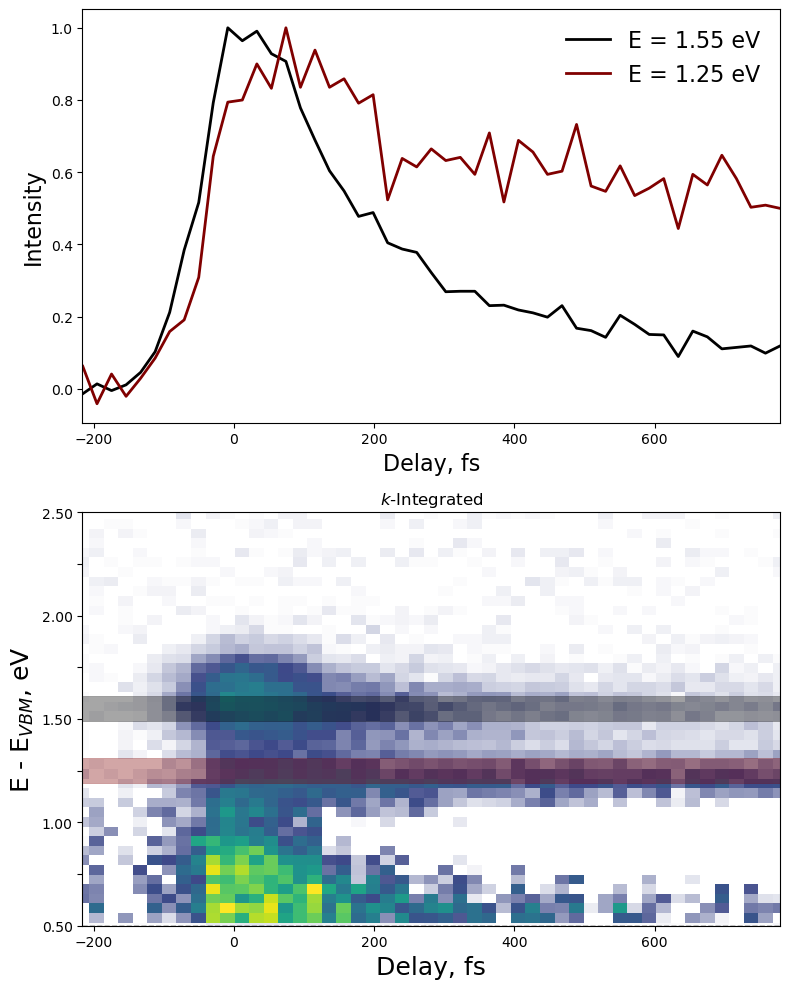

In [171]:
# Plot waterfall
fig, ax = plt.subplots(2,1)
fig.set_size_inches(8, 10, forward=False)
ax = ax.flatten()

# Plot time traces
E, E_int = [1.55, 1.25], .120 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = True
neg_delays = [-250, -150]

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = ax[0],
    colors = ['black', 'maroon'],
    fontsize=16
)

mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = ax[1],
    cmap=cmap_LTL, scale=[0,1], energy_limits=[0.5,2.5]
)

colors = ['black', 'maroon']

for i in np.arange(len(E)):

    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.35))
    ax[1].add_patch(rect3) #Add rectangle to plot


### Overview Plot: MM, Delay Traces, k-cut, and Waterfall Panel

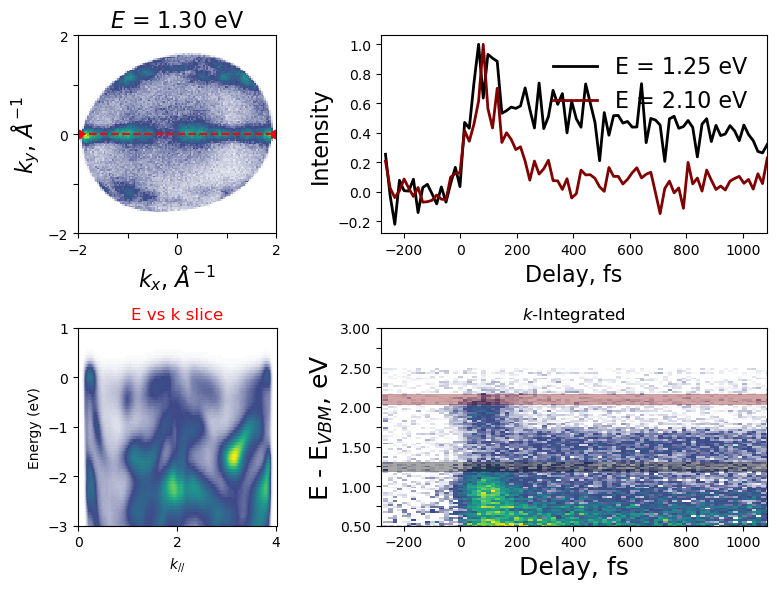

In [209]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1.5], 'height_ratios':[1, 1]})
fig.set_size_inches(8, 6, forward=False)
axs = axs.flatten()

# Plot momentum map
mpes.plot_momentum_maps(
    I_res, E=1.3, E_int=0.2, delays=500, delay_int=1000,
    fig = fig, ax = axs[0],
    cmap=cmap_plot,
    panel_labels=False, fontsize=16,
    nrows=2, figsize=(8, 6)
)

# Plot time traces
E, E_int = [1.25, 2.1], .12 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = True
neg_delays = [-300, -50]

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = axs[1],
    colors = ['black', 'maroon'],
    fontsize=16
)

# Plot kx-E frame
# (kx, ky), (kx_int, ky_int) = (0, 0), (4, 0.5) # Central (kx, ky) point and k-integration
# mpes.plot_kx_frame(
#     I_res, ky, ky_int, delays=[500], delay_int=1000,
#     E_enhance = 1,
#     subtract_neg=subtract_neg, neg_delays=neg_delays,
#     fig = fig, ax = axs[2],
#     cmap = cmap_plot, scale=[0,1], energy_limits=[1,3]
# )

# # Plot ky-E frame
# (kx, ky), (kx_int, ky_int) = (0, 0), (0.5, 0.5) # Central (kx, ky) point and k-integration
# mpes.plot_ky_frame(
#     I_res, ky, ky_int, delays=[500], delay_int=1000,
#     subtract_neg=subtract_neg, neg_delays=neg_delays,
#     fig = fig, ax = axs[2],
#     cmap = 'BuPu', scale=[0,1], energy_limits=[1,3]
# )

# Plot k - E (arbitrary Cut)
k_start, k_end = (-2, 0), (2, 0)
I_cut, k_vals, E_vals = mpes.get_k_cut(I_res.mean(dim="delay"), k_start=k_start, k_end=k_end)

axs[0].plot(k_start[0], k_start[1], 'ro')
axs[0].plot(k_end[0], k_end[1], 'ro')
axs[0].plot([k_start[0], k_end[0]], [k_start[1], k_end[1]], color = 'red', linestyle = 'dashed')

axs[2].pcolormesh(k_vals, E_vals, I_cut, shading='auto', cmap=cmap_LTL)
axs[2].set_xlabel("$k_{//}$")
axs[2].set_ylabel("Energy (eV)")
axs[2].set_title("E vs k slice", color = 'red')
axs[2].set_ylim(-3,1)
axs[2].set_aspect(1)

# Plot waterfall
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = axs[3],
    cmap=cmap_LTL, scale=[0,1], energy_limits=[.5,3]
)

rect = (Rectangle((kx-kx_int/2, ky-ky_int/2), kx_int, ky_int, linewidth=.5,\
                         edgecolor='fuchsia', facecolor='fuchsia', alpha = 0.3))
if kx_int < 4:
    axs[0].add_patch(rect) #Add rectangle to plot
    
colors = ['black', 'maroon']

for i in np.arange(len(E)):
    rect2 = (Rectangle((kx-kx_int/2, E[i]-E_int/2), kx_int, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.5))
    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.35))
    axs[2].add_patch(rect2) #Add rectangle to plot
    axs[3].add_patch(rect3) #Add rectangle to plot

#mpes.save_figure(fig, name = f'test', image_format = 'pdf')
#test

# Data Treatment
### Define E = 0 wrt VBM

E_VBM = -0.155 +- 0.221 eV


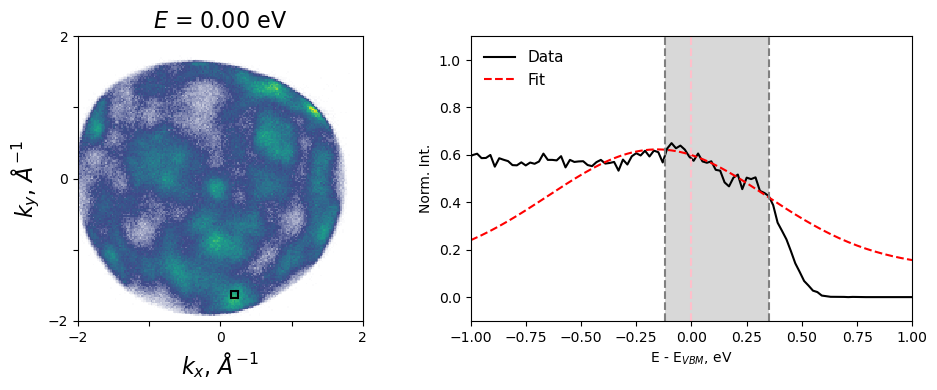

In [282]:
#%% Define E = 0 wrt VBM

%matplotlib inline

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios':[1]})
fig.set_size_inches(10, 4, forward=False)
ax = ax.flatten()

figure_file_name = 'vbm'
save_figure = False

### Plot EDCs at GAMMA vs time

(kx, ky), k_int = (0.2, -1.63), 0.1

delay, delay_int = -200, 200

edc_gamma = mpes.get_edc(I_res, kx, ky, (k_int, k_int), delay, delay_int)
edc_gamma = edc_gamma/np.max(edc_gamma)

mpes.plot_momentum_maps(
    I_res, E=0, E_int=.1, delays=500, delay_int=1000,
    fig = fig, ax = ax[0],
    cmap=cmap_LTL, scale=[0, 1],
    fontsize=16, figsize=(8, 6), colorbar=False, panel_labels = False
)
    
energy_window = [-0.12, 0.35]
p0 = [1, .02, 0.4, 0] # Fitting params initial guess [amp, center, width, offset]

mpes.find_E0(edc_gamma, energy_window, p0, fig, ax)

# cbar_ax = fig.add_axes([.51, 0.275, 0.025, 0.5])
rect = (Rectangle((kx-k_int/2, ky-k_int/2), k_int, k_int, linewidth=1.5,\
                         edgecolor='k', facecolor='None'))

rect1 = (Rectangle((energy_window[0], -.5), (energy_window[1]-energy_window[0]), 2, linewidth=1.5,\
                         edgecolor='none', facecolor='grey', alpha=0.3))

fig.axes[0].add_patch(rect)
fig.axes[1].add_patch(rect1)
ax[1].set_ylim(-0.1,1.1)
ax[1].axvline(energy_window[0], color = 'grey', linestyle = 'dashed')
ax[1].axvline(energy_window[1], color = 'grey', linestyle = 'dashed')
ax[1].axvline(0, color = 'pink', linestyle = 'dashed')


### Define t0 from Signal Rise


t0 = -2.9 +/- 2.7 fs
width = 28.1 +/- 5.3 fs


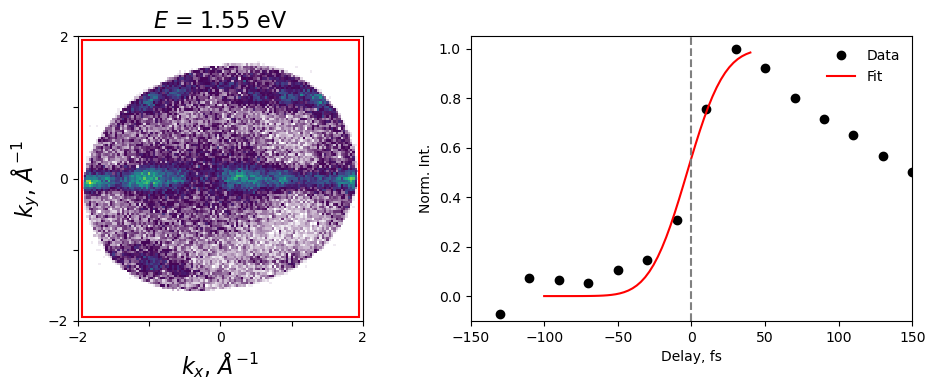

In [26]:
#%% Define t0 from Exciton Rise

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios':[1]})
fig.set_size_inches(10, 4, forward=False)
ax = ax.flatten()

figure_file_name = 'define_t0'
save_figure = False

### Plot EDCs at GAMMA vs time

(kx, ky), (kx_int, ky_int) = (0, 0), (3.9, 3.9)
#(kx, ky), (kx_int, ky_int) = (0, .7), (1.5, 0.5)
E, E_int = 1.55, 0.1
delay_limits = [-100, 40]

mpes.plot_momentum_maps(
    I_res, E=E, E_int=E_int, delays=200, delay_int=700,
    fig = fig, ax = ax[0],
    cmap=cmap_LTL, scale=[0, 1],
    fontsize=16, figsize=(8, 6), colorbar=False, panel_labels = False
)
    
rect = (Rectangle((kx-kx_int/2, ky-ky_int/2), kx_int, ky_int, linewidth=1.5,\
                         edgecolor='red', facecolor='None'))
fig.axes[0].add_patch(rect)

trace_ex = mpes.get_time_trace(I_res, E, E_int, (kx, ky), (kx_int, ky_int), True, True, neg_delays = (-350, -100))
mpes.find_t0(trace_ex, delay_limits, fig, ax)

if save_figure is True:
    mpes.save_figure(fig, name = f'test', image_format = 'pdf')